In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Read the dataframe
df=pd.read_csv('train_feature.csv')
# Read target dataframe
df_target=pd.read_csv('train_target.csv',header=None)
# # Combine the dataframe
# df['target']=df_target

In [3]:
df

,s01__abs_energy,s01__absolute_sum_of_changes,"s01__agg_autocorrelation__f_agg_""mean""__maxlag_40","s01__agg_autocorrelation__f_agg_""median""__maxlag_40","s01__agg_autocorrelation__f_agg_""var""__maxlag_40","s01__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","s01__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","s01__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","s01__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","s01__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,s05__symmetry_looking__r_0.9,s05__symmetry_looking__r_0.9500000000000001,s05__time_reversal_asymmetry_statistic__lag_1,s05__time_reversal_asymmetry_statistic__lag_2,s05__time_reversal_asymmetry_statistic__lag_3,s05__value_count__value_-1,s05__value_count__value_0,s05__value_count__value_1,s05__variance,s05__variance_larger_than_standard_deviation
0,646.848758,48.326,0.457531,0.526795,0.182523,0.177336,-0.046870,-0.000328,0.000443,0.739786,...,1.0,1.0,-2.689816e-07,-2.196929e-06,-7.360087e-06,0.0,7.0,0.0,0.114582,0.0
1,858.096703,54.016,0.455290,0.533254,0.190846,0.279678,-0.136003,-0.001102,0.000510,0.935520,...,1.0,1.0,-2.736823e-05,-4.365014e-05,-5.264389e-05,0.0,1.0,0.0,0.143668,0.0
2,739.238002,44.582,0.482894,0.555161,0.170836,0.264659,-0.126668,-0.000950,0.000472,0.900899,...,1.0,1.0,1.749033e-05,3.343022e-05,4.789204e-05,0.0,7.0,0.0,0.056825,0.0
3,364.419524,36.096,0.447612,0.521247,0.192159,0.149597,-0.075700,-0.000399,0.000334,0.463951,...,1.0,1.0,1.169787e-04,2.235221e-04,3.196125e-04,0.0,3.0,0.0,0.137560,0.0
4,308.763861,32.899,0.453573,0.526357,0.187716,0.156514,-0.114363,-0.000556,0.000307,0.527936,...,1.0,1.0,-3.156254e-05,-6.487429e-05,-9.821437e-05,0.0,9.0,0.0,0.100006,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,171.084206,20.896,0.458404,0.527410,0.181531,0.087691,-0.038947,-0.000141,0.000230,0.310080,...,1.0,1.0,7.922378e-06,1.435869e-05,2.027226e-05,0.0,6.0,0.0,0.096694,0.0
137,278.694002,24.637,0.462770,0.535519,0.182390,0.151026,-0.115360,-0.000536,0.000293,0.454704,...,1.0,1.0,1.072066e-06,4.847134e-06,1.357166e-05,0.0,4.0,0.0,0.142420,0.0
138,90.486989,15.441,0.471626,0.544173,0.177182,0.065861,-0.048118,-0.000128,0.000169,0.193141,...,1.0,1.0,4.230184e-08,2.759659e-07,5.805269e-07,0.0,10.0,0.0,0.068254,0.0
139,145.386940,20.090,0.450642,0.526208,0.191394,0.059469,-0.000714,-0.000002,0.000212,0.218513,...,1.0,1.0,3.175941e-08,5.245637e-07,1.994476e-06,0.0,9.0,0.0,0.092221,0.0


In [4]:
# Perform feature selection
num_of_features=300
selector=SelectKBest(score_func=mutual_info_classif,k=num_of_features)
df_features=selector.fit_transform(df,df_target)

C:\Users\Anuran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
df_features

array([[6.46848758e+02, 4.43369476e-04, 1.57402117e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.58096703e+02, 5.09829851e-04, 1.81118651e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [7.39238002e+02, 4.72443080e-04, 1.67666456e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [9.04869890e+01, 1.68523177e-04, 5.91247971e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.45386940e+02, 2.12289266e-04, 7.48793554e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.86119479e+02, 2.38663884e-04, 8.43938268e-05, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [6]:
mask = selector.get_support() #list of booleans
new_features = [] # The list of your K best features
feature_names= df.columns
# print(feature_names)
for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
print(new_features)

['s01__abs_energy', 's01__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"', 's01__agg_linear_trend__f_agg_"max"__chunk_len_5__attr_"stderr"', 's01__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"', 's01__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"stderr"', 's01__agg_linear_trend__f_agg_"mean"__chunk_len_5__attr_"stderr"', 's01__agg_linear_trend__f_agg_"min"__chunk_len_10__attr_"stderr"', 's01__agg_linear_trend__f_agg_"min"__chunk_len_5__attr_"stderr"', 's01__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"intercept"', 's01__agg_linear_trend__f_agg_"var"__chunk_len_10__attr_"slope"', 's01__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"intercept"', 's01__agg_linear_trend__f_agg_"var"__chunk_len_50__attr_"slope"', 's01__agg_linear_trend__f_agg_"var"__chunk_len_5__attr_"intercept"', 's01__agg_linear_trend__f_agg_"var"__chunk_len_5__attr_"slope"', 's01__augmented_dickey_fuller__attr_"usedlag"', 's01__autocorrelation__lag_0', 's01__change_quantiles__f_

In [7]:
df_selected=df[new_features]
df_selected['target']=df_target
df_selected

C:\Users\Anuran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,s01__abs_energy,"s01__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","s01__agg_linear_trend__f_agg_""max""__chunk_len_5__attr_""stderr""","s01__agg_linear_trend__f_agg_""mean""__chunk_len_10__attr_""stderr""","s01__agg_linear_trend__f_agg_""mean""__chunk_len_50__attr_""stderr""","s01__agg_linear_trend__f_agg_""mean""__chunk_len_5__attr_""stderr""","s01__agg_linear_trend__f_agg_""min""__chunk_len_10__attr_""stderr""","s01__agg_linear_trend__f_agg_""min""__chunk_len_5__attr_""stderr""","s01__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""intercept""","s01__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""slope""",...,s05__symmetry_looking__r_0.55,s05__symmetry_looking__r_0.6000000000000001,s05__symmetry_looking__r_0.65,s05__symmetry_looking__r_0.7000000000000001,s05__symmetry_looking__r_0.75,s05__symmetry_looking__r_0.8,s05__symmetry_looking__r_0.8500000000000001,s05__symmetry_looking__r_0.9,s05__symmetry_looking__r_0.9500000000000001,target
0,646.848758,0.000443,0.000157,0.000441,0.003803,0.000157,0.000434,0.000156,0.010756,-0.000044,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
1,858.096703,0.000510,0.000181,0.000508,0.004352,0.000180,0.000501,0.000180,0.016373,-0.000076,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,739.238002,0.000472,0.000168,0.000470,0.004082,0.000167,0.000463,0.000166,0.015574,-0.000080,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
3,364.419524,0.000334,0.000118,0.000331,0.002776,0.000118,0.000326,0.000117,0.005243,-0.000018,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
4,308.763861,0.000307,0.000109,0.000304,0.002652,0.000108,0.000300,0.000108,0.005447,-0.000023,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,171.084206,0.000230,0.000081,0.000226,0.001971,0.000080,0.000222,0.000080,0.002791,-0.000011,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,45
137,278.694002,0.000293,0.000103,0.000288,0.002631,0.000102,0.000284,0.000102,0.004974,-0.000022,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,45
138,90.486989,0.000169,0.000059,0.000164,0.001512,0.000058,0.000161,0.000058,0.001035,-0.000003,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,46
139,145.386940,0.000212,0.000075,0.000209,0.001855,0.000074,0.000206,0.000074,0.001592,-0.000003,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,46


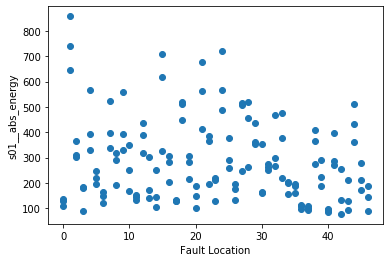

In [8]:
# 2D Plot 
columns_to_plot=['s01__abs_energy']

for col in columns_to_plot:
    # Plot
    plt.scatter(df_selected['target'],df_selected[col])
    plt.xlabel('Fault Location')
    plt.ylabel(col)
    plt.savefig('plots/'+col+'.png',dpi=1000)
    plt.show()
    

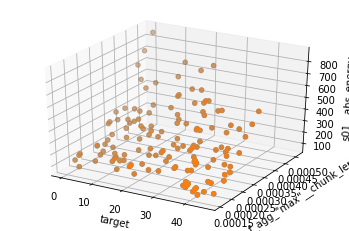

In [11]:
# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

columns_to_plot=['s01__abs_energy','s01__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"']

for col in columns_to_plot:
    
    # Plot
    zs=df_selected[columns_to_plot[0]]
    ys=df_selected[columns_to_plot[1]]
    xs=df_selected['target']
    ax.scatter(xs, ys, zs, zdir='z')
    ax.set_xlabel('target')
    ax.set_ylabel(columns_to_plot[1])
    ax.set_zlabel(columns_to_plot[0])
    
    plt.savefig('plots/plot1'+'.png',dpi=1000)